In [65]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils.metrics import MSE,MAE,RMSE

(22652, 7)


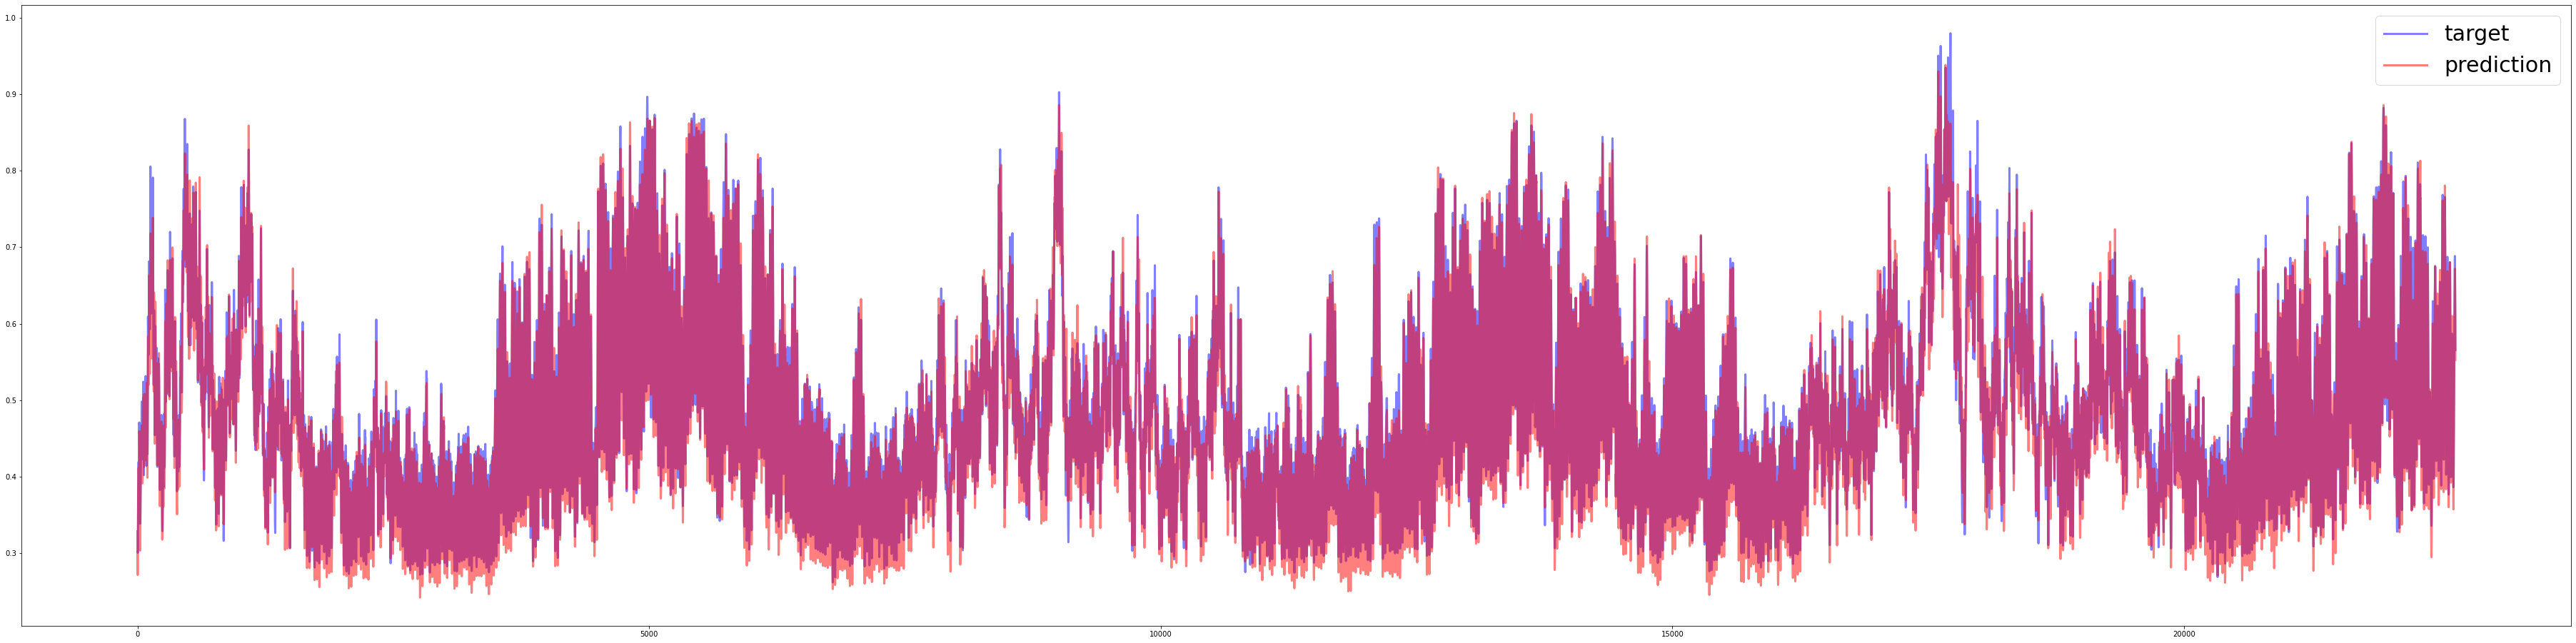

In [68]:
# 'e_DOM', 
for data in ['e_DOM']:
    save_path = os.path.join(f'./exp/linformer-type3-',f'{data}.csv')
    read = pd.read_csv(os.path.join(save_path,'output.csv'), index_col = 0)
    print(read.shape)
    pred = read['pred']
    trues = read['data']
    mse_losses = MSE(pred, trues)
    rmse_losses = RMSE(pred, trues)
    mae_losses = MAE(pred, trues)
    df = pd.DataFrame([round(mse_losses,5),round(mae_losses,5),round(rmse_losses,5)]).T
    df.columns = ['MSE','MAE','RMSE']
    df.to_csv(f'{save_path}/loss.csv')

    plt.figure(figsize=(64, 16))
    plt.plot(trues, color = 'blue',alpha = 0.5,linewidth = 3, label = 'input_raw')
    plt.plot(pred, color = 'red',alpha = 0.5 ,linewidth = 3,label = 'output_inverse')
    plt.legend(['target', 'prediction'], prop={'size': 30})
    plt.savefig(f'{save_path}/all.png')
    plt.show()
    plt.close()

    if data == 'e_DOM':
        plt.figure(figsize=(64, 16))
        plt.plot(trues[:1000], color = 'blue',alpha = 0.5,linewidth = 3, label = 'input_raw')
        plt.plot(pred[:1000], color = 'red',alpha = 0.5 ,linewidth = 3,label = 'output_inverse')
        plt.legend(['target', 'prediction'], prop={'size': 30})
        plt.savefig(f'{save_path}/sample.png')
        plt.close()